# CORA dataset 01 - data loading and EDA

**Problem statement**: classify dataset of academic papers into categories. Papers have text and citations. This problem is a classic graph data modelling problem. We will see that it's difficult to model this data with traditional methods.

We will use the Cora dataset, "the MNIST of graph land." `n=2708` academic papers categorized into seven classes (“Theory,” “Reinforcement learning,” “Probabilistic methods, etc.)

Features:
- **Text**: 1433-dimension vector per sample representing words in the paper text (BoW).
- **Citations**: citations to other papers in the dataset (5429 total citations).

## 0. Preliminaries

Following [tutorial](https://neo4j.com/blog/machine-learning-innovation-predictive-analysis/).

1. In Neo4j Desktop, start a local DBMS and install the Graph Data Science Library and APOC plugins.
2. Move the data from this repo `cora/data/*.csv` to the database's `import` folder. You can find this under `Open/Open folder/Import` in Neo4j Desktop.

## 1. Load data into Neo4j

In [1]:
from getpass import getpass
from graphdatascience import GraphDataScience
auth = ("neo4j", getpass("Password:"))
bolt = "bolt://localhost:7687/neo4j"
gds = GraphDataScience(bolt, auth=auth)

Password: ········


The following cypher commands load the `csv`s into Neo4j:

In [4]:
gds.run_cypher("""
LOAD CSV WITH HEADERS FROM "file:///nodes.csv" AS row
WITH toInteger(row.id) AS paperId, row.subject AS subject, row.features AS features
MERGE (p:Paper {paper_Id: paperId})
SET p.subject = subject, p.features = apoc.convert.fromJsonList(features)
RETURN count(p)
""")

gds.run_cypher("""
LOAD CSV WITH HEADERS FROM "file:///edges.csv" AS row
MATCH(source: Paper {paper_Id: toInteger(row.source)})
MATCH(target: Paper {paper_Id: toInteger(row.target)})
MERGE (source)-[r:CITES]->(target)
""")

""


Tabular data model

In [ ]:
import pandas as pd
...

Demo: visualise graph using cypher queries in Neo4j Browser, such as

`MATCH (p:Paper) -[:CITES]-> (q:Paper) RETURN p,q LIMIT 20`

## 2. Preprocess

Firstly make categorical label from subject:

In [10]:
gds.run_cypher("""
MATCH (p:Paper)
SET p.subjectClass = {
    Neural_Networks: 0, Rule_Learning: 1, Reinforcement_Learning: 2, Probabilistic_Methods: 3, Theory: 4, Genetic_Algorithms: 5, Case_Based: 6
}[p.subject];
""")

""


## 3. EDA

In [11]:
import pandas as pd

In [17]:
nodes = pd.read_csv("data/nodes.csv", index_col=0)

Size of classes

<AxesSubplot: >

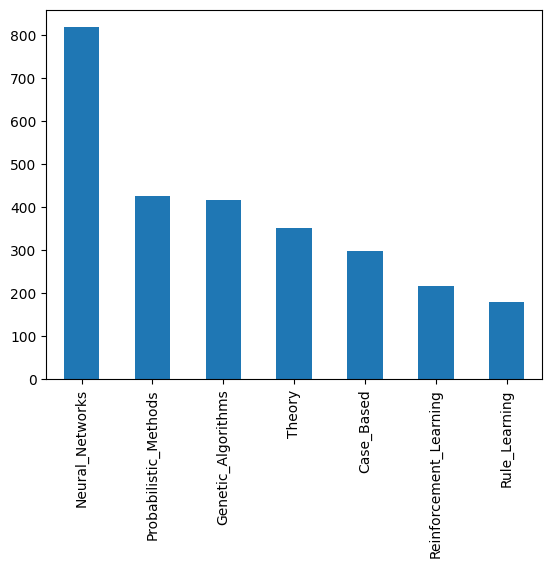

In [21]:
nodes["subject"].value_counts().plot.bar()